In [3]:
import pandas as pd

In [5]:
raw = pd.read_csv("data/Superstore Sales Analysis.csv")

In [6]:
raw.shape

(9994, 21)

In [7]:
raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
raw['Order Date']  = pd.to_datetime(raw['Order Date'])
raw['Ship Date']  = pd.to_datetime(raw['Ship Date'])

In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [10]:
print(f'Sales is {raw['Sales'].sum():,.2f} and \ Gross Profit is {raw['Profit'].sum():,.2f}' )

<unknown>:1: SyntaxWarning: invalid escape sequence '\ '
<>:1: SyntaxWarning: invalid escape sequence '\ '
<>:1: SyntaxWarning: invalid escape sequence '\ '
<ipython-input-10-5983bfaf48d4>:1: SyntaxWarning: invalid escape sequence '\ '
  print(f'Sales is {raw['Sales'].sum():,.2f} and \ Gross Profit is {raw['Profit'].sum():,.2f}' )


Sales is 2,297,200.86 and \ Gross Profit is 286,397.02


In [11]:
print(f' GP% for 4 years is {(raw['Profit'].sum()/raw['Sales'].sum())*100:,.2f}%')

 GP% for 4 years is 12.47%


In [12]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [13]:
raw['Order_to_Ship_Days'] = (raw['Ship Date']-raw['Order Date']).dt.days

In [14]:
# Create 'Year', 'Month', and 'Day' columns from 'Order Date'
raw['Order_Year'] = raw['Order Date'].dt.year
raw['Order_Month'] = raw['Order Date'].dt.month
raw['Order_Day'] = raw['Order Date'].dt.day

In [98]:
annual_Sales = pd.DataFrame(raw.groupby(['Order_Year'])['Sales'].sum())
annual_Sales['average_sales'] = annual_Sales['Sales'].sum()/4
annual_Sales['Variance'] = annual_Sales['Sales']-annual_Sales['average_sales']
annual_Sales

,Sales,average_sales,Variance
Order_Year,,,
2014,484247.4981,574300.215075,-90052.716975
2015,470532.5090,574300.215075,-103767.706075
2016,609205.5980,574300.215075,34905.382925
2017,733215.2552,574300.215075,158915.040125


In [90]:
raw
pivot_raw = pd.pivot_table(data = raw , index = 'Order_Year', values = ['Sales','Profit'], aggfunc = 'sum')

In [91]:
pivot_raw

,Profit,Sales
Order_Year,,
2014,49543.9741,484247.4981
2015,61618.6037,470532.5090
2016,81795.1743,609205.5980
2017,93439.2696,733215.2552


In [114]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Row ID              9994 non-null   int64         
 1   Order ID            9994 non-null   object        
 2   Order Date          9994 non-null   datetime64[ns]
 3   Ship Date           9994 non-null   datetime64[ns]
 4   Ship Mode           9994 non-null   object        
 5   Customer ID         9994 non-null   object        
 6   Customer Name       9994 non-null   object        
 7   Segment             9994 non-null   object        
 8   Country             9994 non-null   object        
 9   City                9994 non-null   object        
 10  State               9994 non-null   object        
 11  Postal Code         9994 non-null   int64         
 12  Region              9994 non-null   object        
 13  Product ID          9994 non-null   object      

In [106]:
# cat_data = ['Order ID', 'Customer ID', 'Segment' , 'City','State', 'Region' , 'Category', 'Sub-Category', 'Product Name']]

cat_counts = raw['Sub-Category'].value_counts()

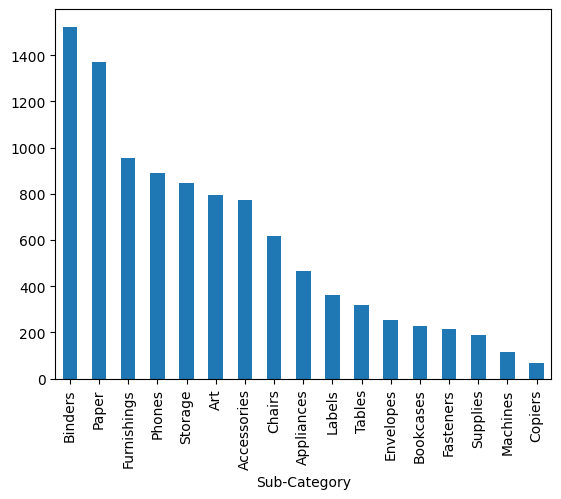

In [109]:
cat_counts.plot(kind = 'bar')
plt.show()

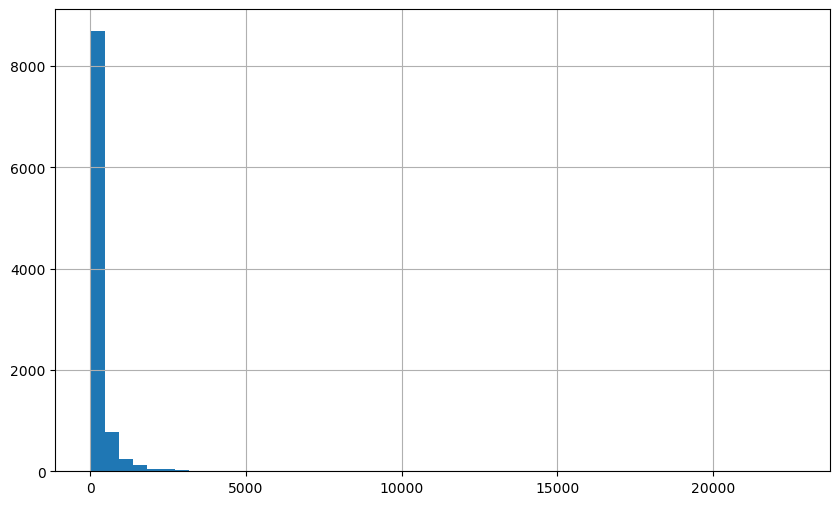

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [112]:
plt.figure(figsize=(10,6))
raw['Sales'].hist(bins = 50)
plt.show()
raw['Sales'].describe()

In [113]:
# Bivariate_analysis

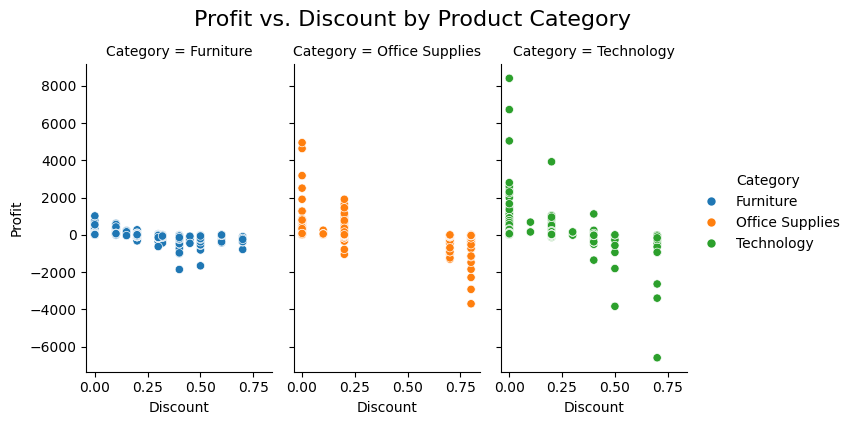

In [130]:
# sns.relplot(data =raw, col = 'Category', hue='Category',kind = 'scatter')

sns.relplot(
    data=raw,
    x="Discount",
    y="Profit",
    col="Category",
    hue="Category",  # Color the points by category for clarity
    kind="scatter",
    height=4,        # Control the height of each plot
    aspect=0.6    # Control the width-to-height ratio
)
plt.suptitle('Profit vs. Discount by Product Category', y=1.05, fontsize=16)
plt.show()


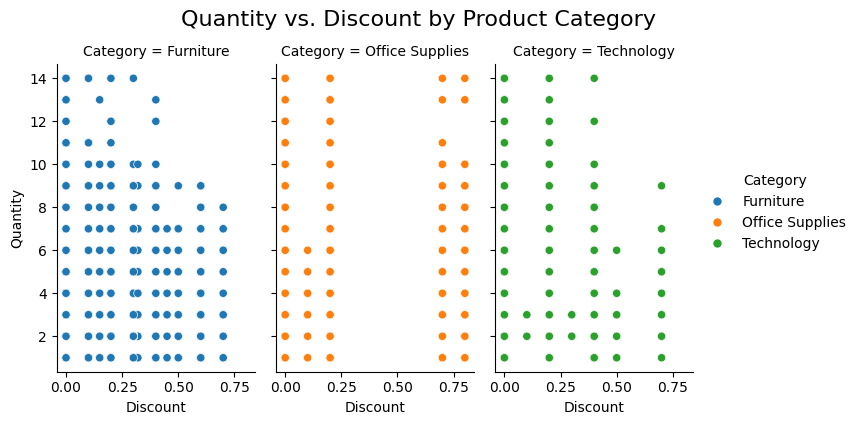

In [133]:

sns.relplot(
    data=raw,
    x="Discount",
    y="Quantity",
    col="Category",
    hue="Category",  # Color the points by category for clarity
    kind="scatter",
    height=4,        # Control the height of each plot
    aspect=0.6    # Control the width-to-height ratio
)
plt.suptitle('Quantity vs. Discount by Product Category', y=1.05, fontsize=16)
plt.show()


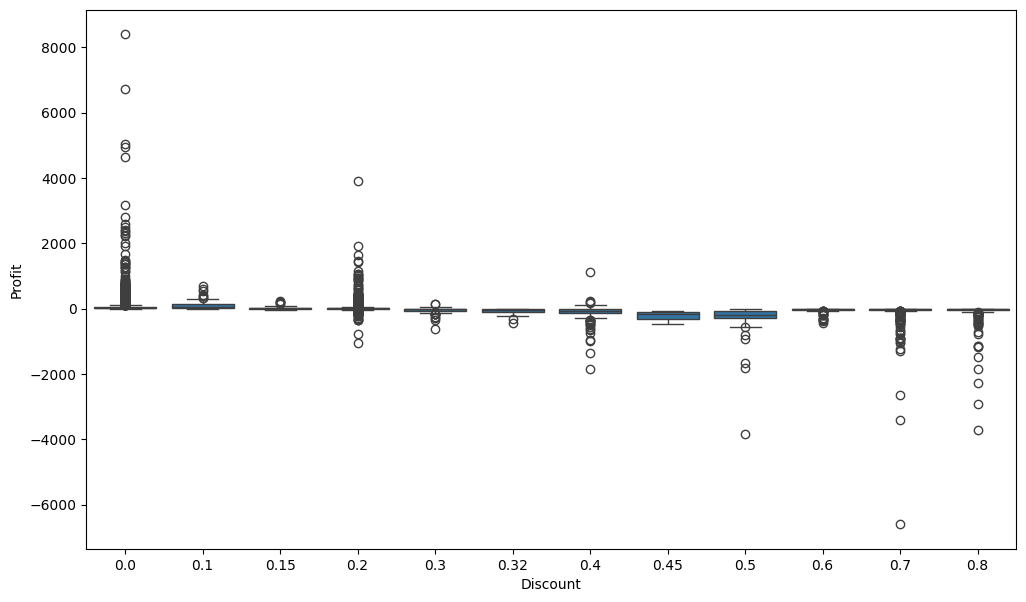

In [131]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Discount', y = 'Profit', data = raw)
plt.show()

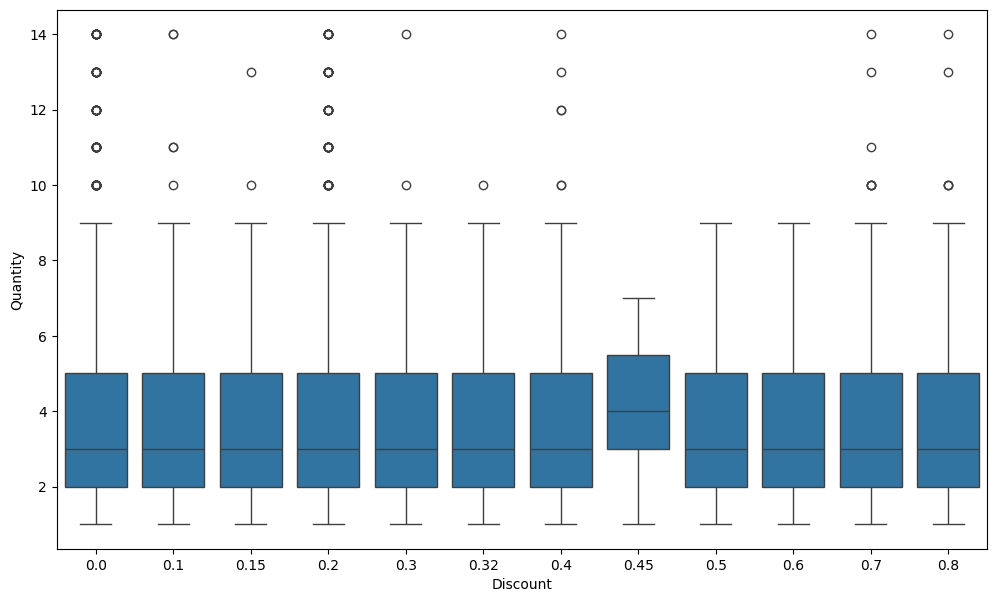

In [134]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Discount', y = 'Quantity', data = raw)
plt.show()

In [137]:
numerical_df = raw[['Sales', 'Quantity', 'Discount', 'Profit', 'Order_to_Ship_Days']]
correlation_matrix = numerical_df.corr()
correlation_matrix


,Sales,Quantity,Discount,Profit,Order_to_Ship_Days
Sales,1.000000,0.200795,-0.028190,0.479064,-0.007354
Quantity,0.200795,1.000000,0.008623,0.066253,0.018298
Discount,-0.028190,0.008623,1.000000,-0.219487,0.000408
Profit,0.479064,0.066253,-0.219487,1.000000,-0.004649
Order_to_Ship_Days,-0.007354,0.018298,0.000408,-0.004649,1.000000


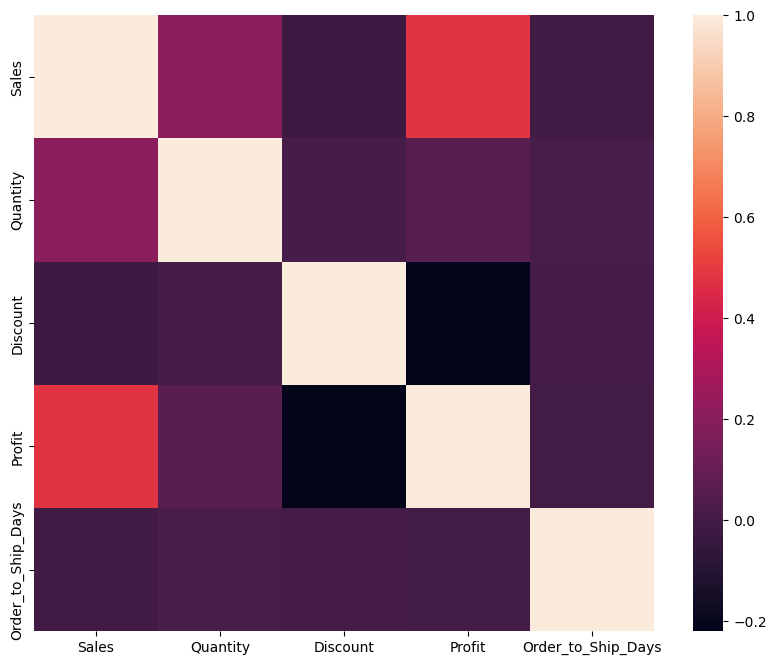

In [138]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, fmt=".2f")
plt.show()

In [26]:
# Customer Segmentation

snapshot_date = raw['Order Date'].max()+pd.DateOffset(days=1)
snapshot_date.date()


datetime.date(2017, 12, 31)

In [34]:
rfm_data = raw.groupby('Customer ID').agg(
    Recency = ('Order Date',lambda x: (snapshot_date - x.max()).days),
    Frequency = ('Order ID', 'count'),
    Monetary = ('Sales', 'sum')
)
rfm_data.reset_index(inplace = True)

In [35]:
rfm_data.head()

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,11,5563.560
1,AA-10375,20,15,1056.390
2,AA-10480,260,12,1790.512
3,AA-10645,56,18,5086.935
4,AB-10015,416,6,886.156


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [37]:
rfm_scaled_data = rfm_data[['Recency','Frequency','Monetary']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm_scaled_data)

In [38]:
scaled_features

array([[ 0.19988856, -0.25691161,  1.01511197],
       [-0.68676201,  0.38425569, -0.70059002],
       [ 0.60291154, -0.09661979, -0.4211387 ],
       ...,
       [-0.74049841, -0.09661979,  1.45549211],
       [-0.49868462,  2.9489249 ,  1.9523543 ],
       [ 0.29661407, -0.57749527, -0.53403045]])

In [39]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init= 10)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

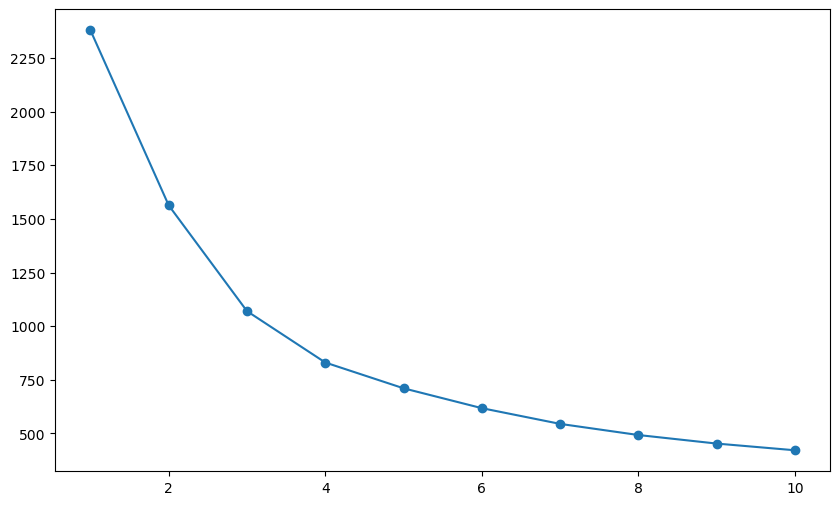

In [40]:
plt.figure(figsize = (10, 6))
plt.plot(range(1,11), sse, marker = 'o')
plt.show()

In [42]:
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)
kmeans.fit(scaled_features)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [44]:
rfm_data['Cluster'] = kmeans.labels_

cluster_summary = rfm_data.groupby('Cluster').agg(
    Recency = ('Recency', 'mean'),
    Frequency = ('Frequency', 'mean'),
    Monetary = ('Monetary', 'mean'),
    count = ('Customer ID', 'count')
).sort_values(by = 'Monetary', ascending = False)

cluster_summary

,Recency,Frequency,Monetary,count
Cluster,,,,
2,110.730159,21.142857,9457.539378,63
0,73.104693,17.281588,3599.506911,277
1,543.619048,7.800000,1574.658788,105
3,94.543103,8.781609,1548.773829,348


In [49]:
rfm_data

,Customer ID,Recency,Frequency,Monetary,Cluster
0,AA-10315,185,11,5563.560,0
1,AA-10375,20,15,1056.390,0
2,AA-10480,260,12,1790.512,3
3,AA-10645,56,18,5086.935,0
4,AB-10015,416,6,886.156,1
...,...,...,...,...,...
788,XP-21865,44,28,2374.658,0
789,YC-21895,5,8,5454.350,3
790,YS-21880,10,12,6720.444,0
791,ZC-21910,55,31,8025.707,2


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

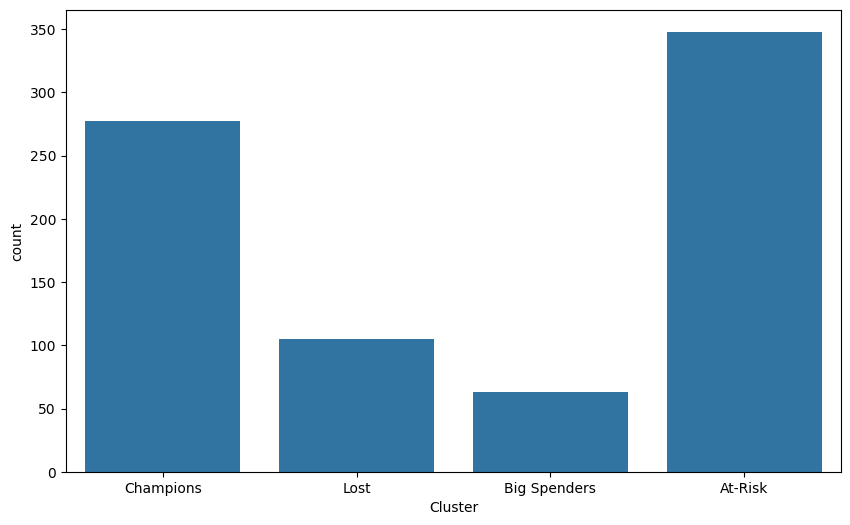

In [50]:
%pip install seaborn
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Cluster', data = rfm_data)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Champions', 'Lost', 'Big Spenders', 'At-Risk'])
plt.show()

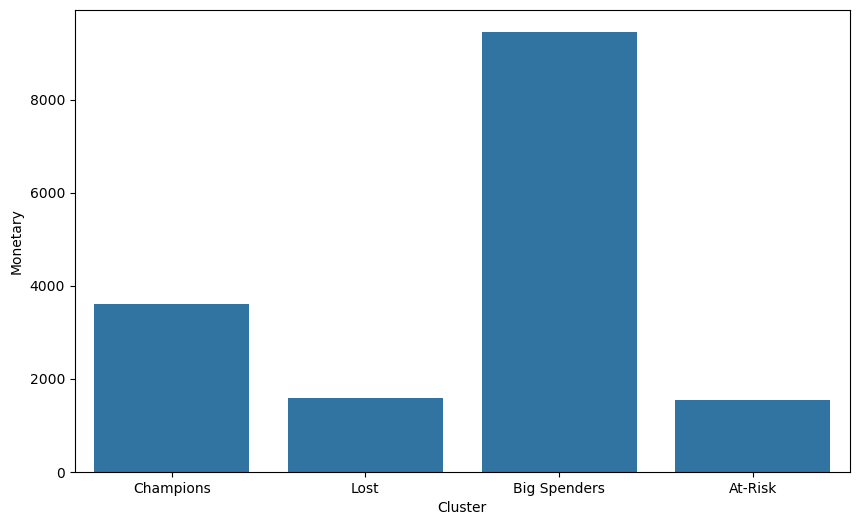

In [61]:
average_monetary_summary = rfm_data.groupby('Cluster')['Monetary'].mean().reset_index()

plt.figure(figsize = (10,6))
sns.barplot(data = average_monetary_summary , x= 'Cluster', y = 'Monetary')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Champions', 'Lost', 'Big Spenders', 'At-Risk'])
plt.show()

In [57]:
average_monetary_summary

,Cluster,Monetary
0,0,3599.506911
1,1,1574.658788
2,2,9457.539378
3,3,1548.773829
